In [1]:
#A_ch02_0052_multipleLinear_20180829.ipynb
#使用波士頓資料集預測房價

In [2]:
from sklearn import datasets

In [3]:
#載入boston datasets
boston = datasets.load_boston() 

In [4]:
#step 0: 檢視 boston datasets
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
#step 1: 將資料建成 DataFrame

In [9]:
import pandas as pd

In [10]:
#features X
X=pd.DataFrame(boston.data,columns=boston.feature_names)

In [11]:
X.head() #檢視前5筆, 13個特徵(解釋變數)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#target y
y=pd.DataFrame(boston.target,columns=["MEDV"])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
#step 2: 訓練線性迴歸模型(LinearRegression) 
from sklearn.linear_model import LinearRegression
lModel=LinearRegression()
lModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#檢視model "lModel"的係數 .coef_ 及截距 .intercept_
print('lModel.coef_ -->',lModel.coef_)

lModel.coef_ [[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
  -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
   3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
  -5.25466633e-01]]


In [16]:
print('lModel.intercept_ -->',lModel.intercept_)

lModel.intercept_ --> [36.49110328]


In [21]:
#建一個 DataFrame "coef", 展示模型 lModel 各特徵的係數
coef=pd.DataFrame(boston.feature_names,columns=["features"])

In [29]:
coef["estimateCoef"]=lModel.coef_.reshape(13,)

In [31]:
coef

,features,estimateCoef
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [32]:
#我們可以觀察到 RM (average number of rooms per dwelling)
#是最高的係數, 表示RM與房價(target)高度相關, 所以我們以RM及y繪製散佈圖

In [34]:
import matplotlib.pylab as plt
%matplotlib inline

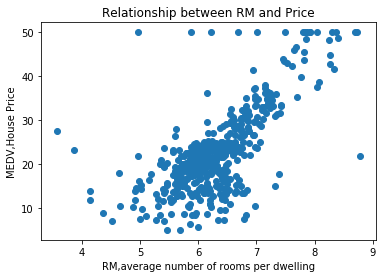

In [59]:
plt.scatter(X.RM,y.values)
plt.xlabel("RM,average number of rooms per dwelling")
plt.ylabel("MEDV,House Price")
plt.title("Relationship between RM and Price")
plt.show()

In [38]:
#predict, 以 .predict() method 對X做預測
predicted_price=lModel.predict(X)

In [39]:
#檢視前五筆預測值
predicted_price[:5]

array([[30.00821269],
       [25.0298606 ],
       [30.5702317 ],
       [28.60814055],
       [27.94288232]])

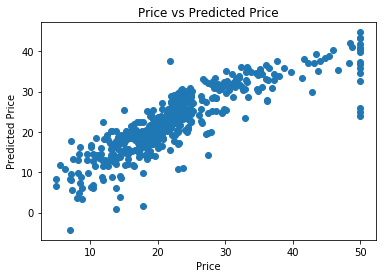

In [58]:
#檢視: 用真實房價(y)對預測房價(predicted_price) 做散佈圖
plt.scatter(y.values,predicted_price)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [41]:
#異常值 (Outlier) 與 殘差圖 (Resdual Plots)

In [42]:
#訓練(Training Dataset)和測試資料集(Test Dataset)
#train_test_split() function
from sklearn.model_selection import train_test_split

In [43]:
XTrain,XTest,yTrain,yTest=train_test_split(X,y,random_state=42)

In [44]:
#以Training Dataset 訓練模型
lModel=LinearRegression().fit(XTrain,yTrain)

In [45]:
#用訓練好的 model 預測 Test Dataset
pred_test=lModel.predict(XTest)

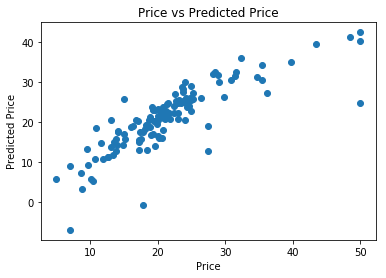

In [61]:
#以Test Dataset 中，真實房價 yTest對預測房價pred_test 繪圖
plt.scatter(yTest.values,pred_test)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [62]:
#評估模型的績效 (R-squared) R2
lModel.score(XTrain,yTrain)

0.748105199058599

In [64]:
lModel.score(XTest,yTest)

0.6839557243179213

In [65]:
#使用 「殘差圖」(Residual Plots) 找異常值 (Outlier)